# An Investigation Into Wellington Earthquakes -Modelling Notebook

## Data source:

In [ ]:
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=BBOX(origin_geom,166,-50,180,-33)+AND+magnitude>4.5

All New Zealand events with magnitude >3.0, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=BBOX(origin_geom,166,-50,179,-34)+AND+origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+magnitude>3

All events within 100km of Wgtn centre, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),100000,meters)

All events within 15km of Wgtn centre, magnitude <3.01, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),15000,meters)+AND+magnitude<3.01

All events within 30km of Wgtn centre, magnitude >3, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),30000,meters)+AND+magnitude>3

All events within 100km of Wgtn centre, magnitude >4, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),100000,meters)+AND+magnitude>4

All events within 300km of Wgtn centre, magnitude >5, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),300000,meters)+AND+magnitude>5

All events within 600km of Wgtn centre, magnitude >6, 1982-1922:  
http://wfs.geonet.org.nz/geonet/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=geonet:quake_search_v1&outputFormat=csv&cql_filter=origintime>='1982-01-01'+AND+origintime<'2022-01-01'+AND+DWITHIN(origin_geom,Point+(174.77557+-41.28664),600000,meters)+AND+magnitude>6

Description of Catalogue Outputs

* Field	Description
* publicid	The Public Id, a unique earthquake reference code.
* eventtype	The type of seismic event, eg. earthquake, quarry blast, outside of network interest, etc.
* origintime	The UTC time of the event's occurrence (in ISO 8601 format).
* modificationtime	The UTC time of the event's last update to its information (in ISO 8601 format).
* latitude	The latitude of the event (decimal degrees, WGS84 datum).
* longitude	The longitude of the event (decimal degrees, WGS84 datum).
* depth	The focal depth of the event (km).
* magnitude	The magnitude of the event.
* evaluationmethod	The computer technique used to locate the earthquake.
* evaluationstatus	The status of the location: preliminary, reviewed, etc.
* evaluationmode	The mode of location: manual or automatic.
* earthmodel	The earth model used by the evaluationmethod.
* depthtype	The type of depth determination.
* originerror	The standard error of travel time residuals (seconds).
* usedphasecount	The number of defining phases used computing the location.
* usedstationcount	The number of stations from which phases were used in computing the location.
* minimumdistance	The epicentral distance to the closest station (degrees).
* azimuthalgap	The largest azimuthal gap in station distribution (degrees).
* magnitudetype	The type of magnitude determined.
* magnitudeuncertainty	The standard error of magnitude.
* magnitudestationcount	The number of stations used to determine the magnitude.

## Loading Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import json
import folium
%matplotlib inline
warnings.filterwarnings('ignore')

### All events within 100km of Wellington centre, 1982-2022

In [12]:
cols = ['publicid','eventtype','origintime','longitude','latitude','magnitude', 'depth','originerror','magnitudeuncertainty']
Wdata = pd.read_csv("earthquakes.csv", usecols=cols, header=0)
Wdata.shape

(98365, 9)

### Events tiered by magnitude with range reflective of ability to impact Wellington, 1982-2022

Whilst the ability to feel an earthquake can depend on numerous factors including depth, regional geoology and the built environment, a general approximation can be made based on empirical observations to the relationship between magnitude and distance from the epicenter.  
* Magnitude 2.0-3.0   -Felt only near from the epicenter
* Magnitude 3.0-4.0   -Felt up to 10-25km from the epicenter
* Magnitude 4.0-5.0   -Felt up to 50-100km from the epicenter
* Magnitude 5.0-6.0   -Felt up to 300km from the epicenter
* Magnitude 6.0-7.0   -Felt up to 600km from the epicenter

For this project, the range of interest will be within a 15km range of the centre of Wellington (-41.28664,17477557), so magnitudes below 3 will be considered within 15km, magnitudes 3-4 within 30km, 4-5 within 100km, 5-6 within 300km and 6+ within 600km.

In [17]:
threeminus = pd.read_csv("earthquakes2.csv", usecols=cols, header=0)
threeplus = pd.read_csv("earthquakes3.csv", usecols=cols, header=0)
fourplus = pd.read_csv("earthquakes4.csv", usecols=cols, header=0)
fiveplus = pd.read_csv("earthquakes5.csv", usecols=cols, header=0)
sixplus= pd.read_csv("earthquakes6.csv", usecols=cols, header=0)

#### Combined Dataframe

In [23]:
Wellington = pd.concat([threeminus,threeplus,fourplus,fiveplus,sixplus])
Wellington['origintime'] = pd.to_datetime(Wellington['origintime'],utc=True)
Wellington = Wellington.sort_values(by='origintime')
Wellington = Wellington.reset_index(drop=True)
Wellington.shape

(4353, 9)

In [24]:
mean_mag=np.mean(Wellington[Wellington['magnitude']>0]['magnitude'])
mean_mag

2.8904407357609196

In [25]:
# Replace values in 'magnitude' that are less than 0 with mean_mag
Wellington.loc[Wellington['magnitude'] < 0, 'magnitude'] = mean_mag

In [67]:
externals = pd.concat([fiveplus,sixplus])
externals['origintime'] = pd.to_datetime(externals['origintime'],utc=True)
externals = externals.sort_values(by='origintime')
externals = externals.reset_index(drop=True)
externals['year']=externals['origintime'].dt.year
externals['month']=externals['origintime'].dt.month
externals.shape

(334, 11)

In [75]:
# Group by 'year' and 'month'
grouped = quakes.groupby(['year', 'month'])

In [76]:
# Calculate statistics
def calculate_stats(group):
    avg_magnitude = group['magnitude'].mean()
    total_energy = group['energy'].sum()
    avg_small_energy = group[group['magnitude']<=4]['energy'].mean()
    avg_energy = group['energy'].mean()
    num_events_gt_5 = (group['magnitude'] > 5).sum()
    total_events = len(group)
    
    # Calculate average time between events
    group_sorted = group.sort_values('origintime')
    time_differences = group_sorted['origintime'].diff().dropna()
    avg_time_between_events = time_differences.mean() if not time_differences.empty else pd.NaT
    
    return pd.Series({
        'avg_magnitude': avg_magnitude,
        'total_energy': total_energy,
        'avg_small_energy': avg_small_energy,
        'avg_energy': avg_energy,
        'num_events_gt_5': num_events_gt_5,
        'total_events': total_events,
        'avg_time_between_events': avg_time_between_events
    })

In [77]:
# Apply the function to each group
month_data = grouped.apply(calculate_stats).reset_index()

In [78]:
month_data.head()

,year,month,avg_magnitude,total_energy,avg_small_energy,avg_energy,num_events_gt_5,total_events,avg_time_between_events
0,1982,1,2.202635,1.101481e+11,1.598544e+08,1.059117e+09,0,104,0 days 07:08:18.462135922
1,1982,2,2.253754,5.493680e+10,4.819018e+08,4.819018e+08,0,114,0 days 05:48:13.889115044
2,1982,3,2.260620,1.426855e+11,4.306585e+08,1.321162e+09,0,108,0 days 06:43:15.455233644
3,1982,4,2.042522,4.040587e+10,3.575740e+08,3.575740e+08,0,113,0 days 06:24:19.877678571
4,1982,5,2.095663,3.152091e+10,3.120882e+08,3.120882e+08,0,101,0 days 07:09:48.943200


In [79]:
month_data['datetime'] = pd.to_datetime(month_data[['year', 'month']].assign(day=1))

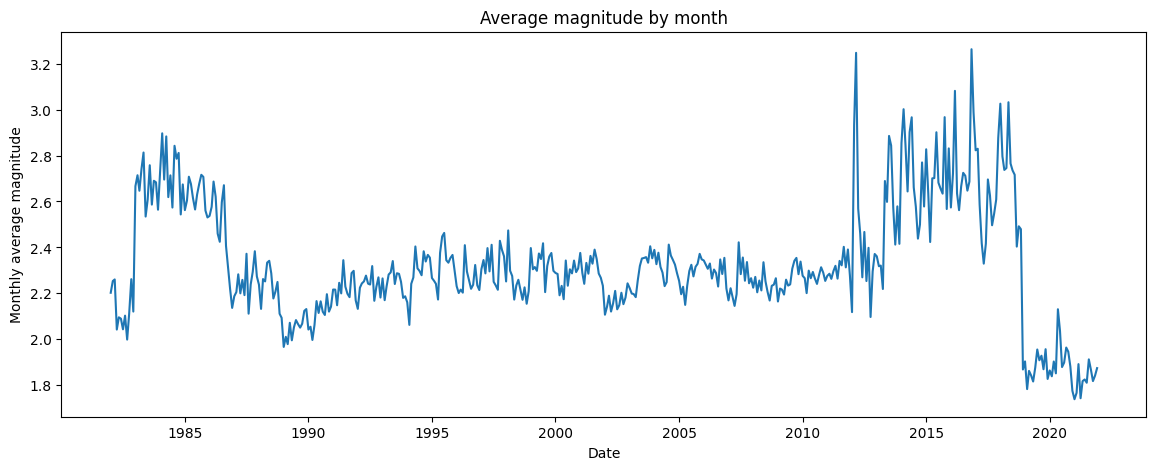

In [80]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['avg_magnitude'], marker='none', linestyle='-')
plt.title('Average magnitude by month')
plt.xlabel('Date')
plt.ylabel('Monthly average magnitude')
plt.show()

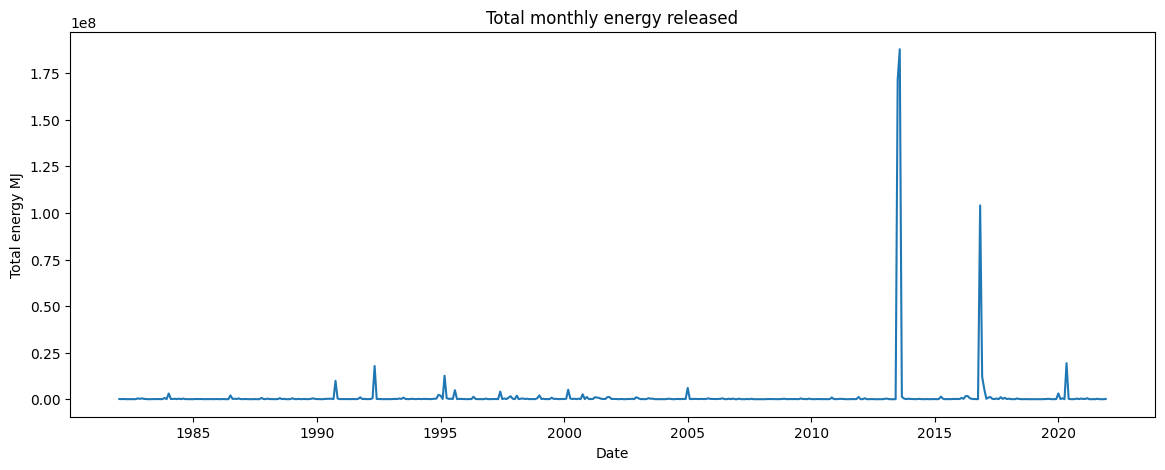

In [81]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['total_energy']/1000000, marker='none', linestyle='-')
plt.title('Total monthly energy released')
plt.xlabel('Date')
plt.ylabel('Total energy MJ')
plt.show()

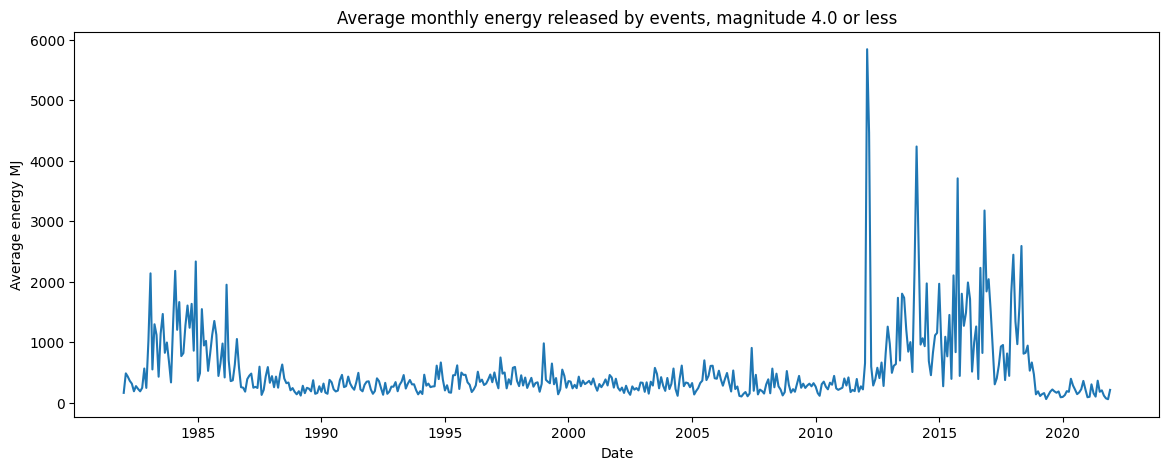

In [82]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['avg_small_energy']/1000000, marker='none', linestyle='-')
plt.title('Average monthly energy released by events, magnitude 4.0 or less')
plt.xlabel('Date')
plt.ylabel('Average energy MJ')
plt.show()

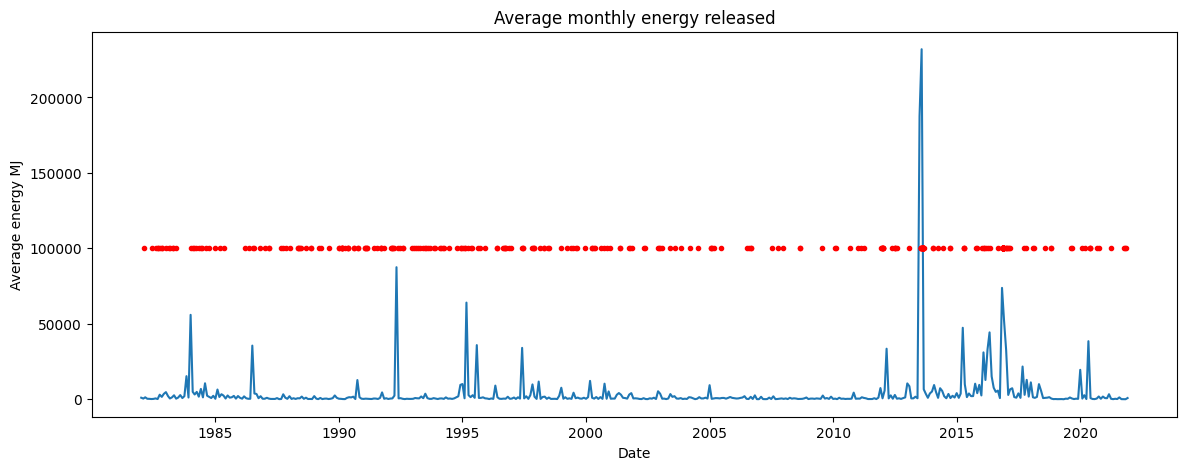

In [83]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['avg_energy']/1000000, marker='none', linestyle='-')
plt.plot(externals['origintime'],[100000]*len(externals['origintime']),marker='.',linestyle='none',color='red')
plt.title('Average monthly energy released')
plt.xlabel('Date')
plt.ylabel('Average energy MJ')
plt.show()

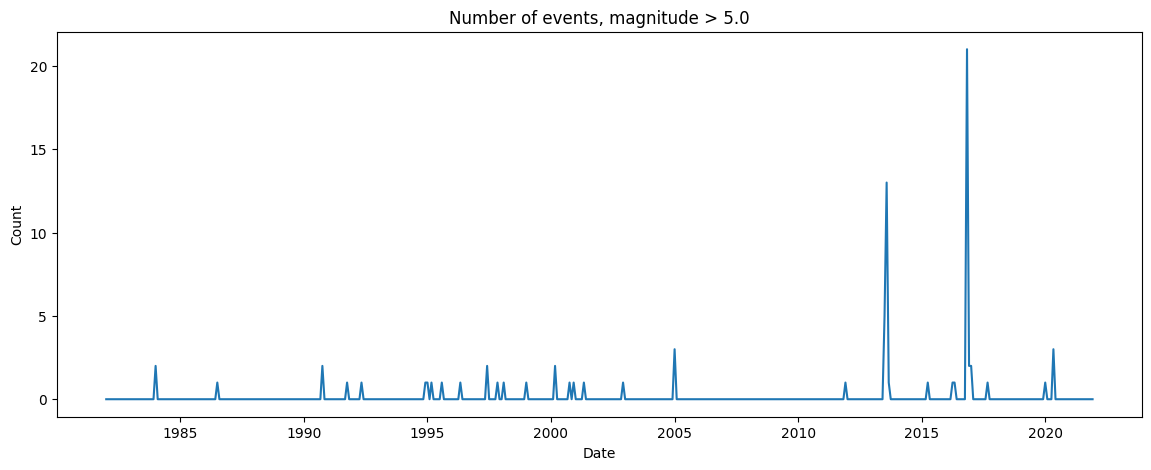

In [84]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['num_events_gt_5'], marker='none', linestyle='-')
plt.title('Number of events, magnitude > 5.0')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

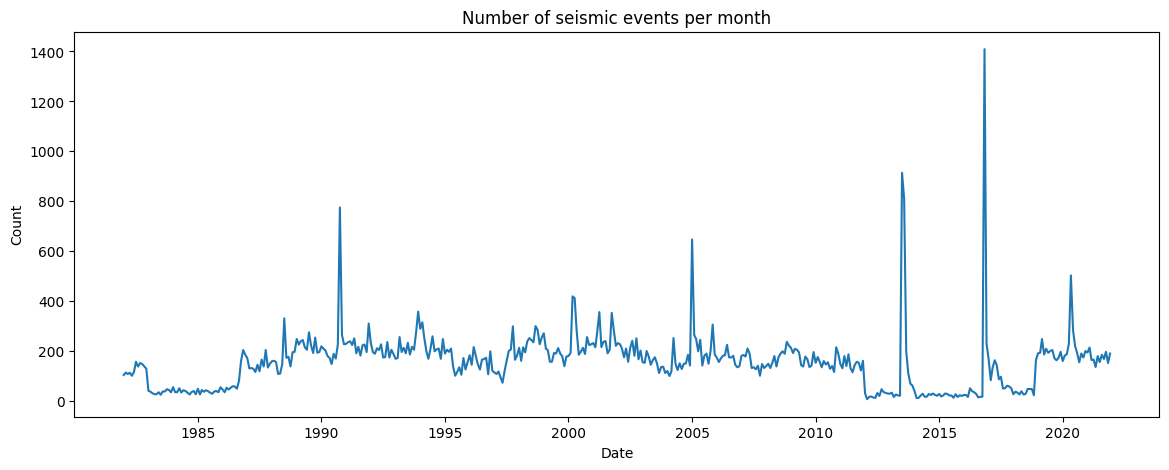

In [85]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['total_events'], marker='none', linestyle='-')
plt.title('Number of seismic events per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

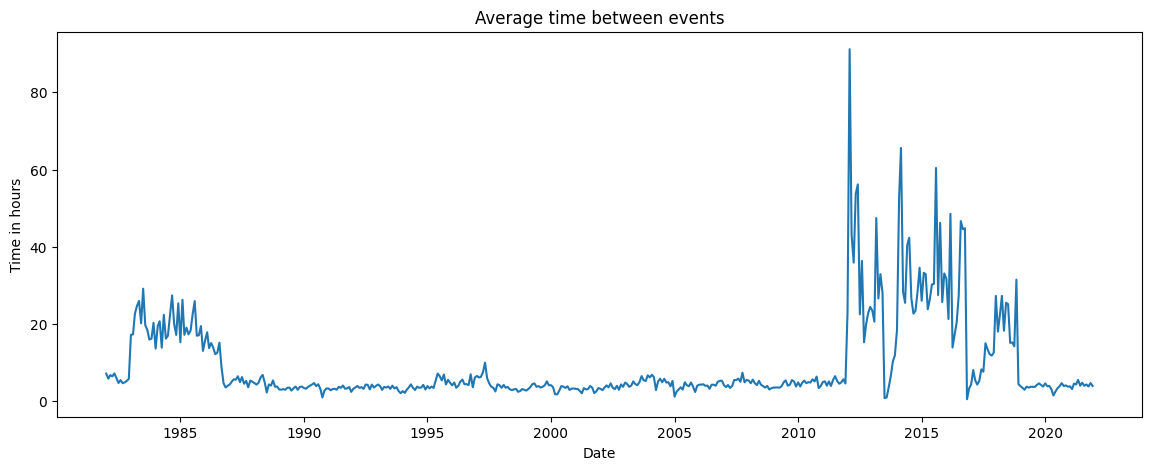

In [86]:
plt.figure(figsize=(14, 5))
plt.plot(month_data['datetime'], month_data['avg_time_between_events'].dt.total_seconds()/3600, marker='none', linestyle='-')
plt.title('Average time between events')
plt.xlabel('Date')
plt.ylabel('Time in hours')
plt.show()

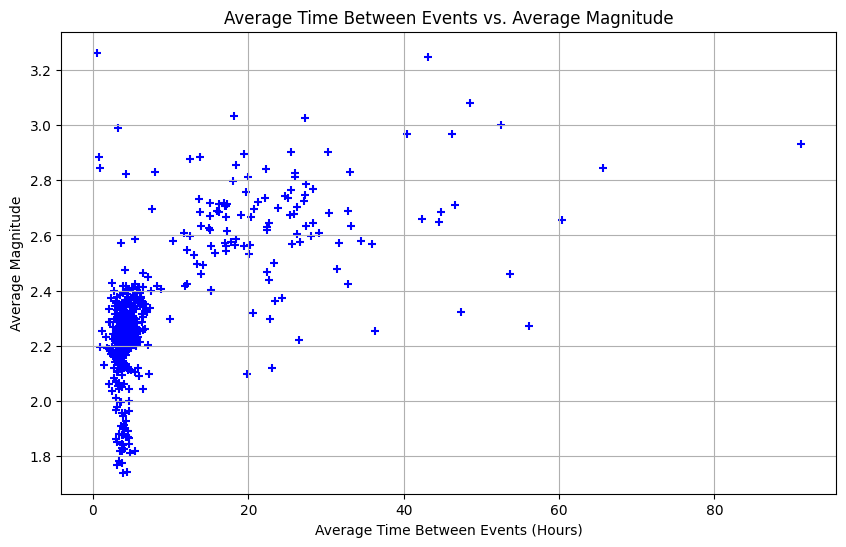

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(month_data['avg_time_between_events'].dt.total_seconds()/3600, month_data['avg_magnitude'], marker='+', color='blue')

# Plot formatting
plt.title('Average Time Between Events vs. Average Magnitude')
plt.xlabel('Average Time Between Events (Hours)')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

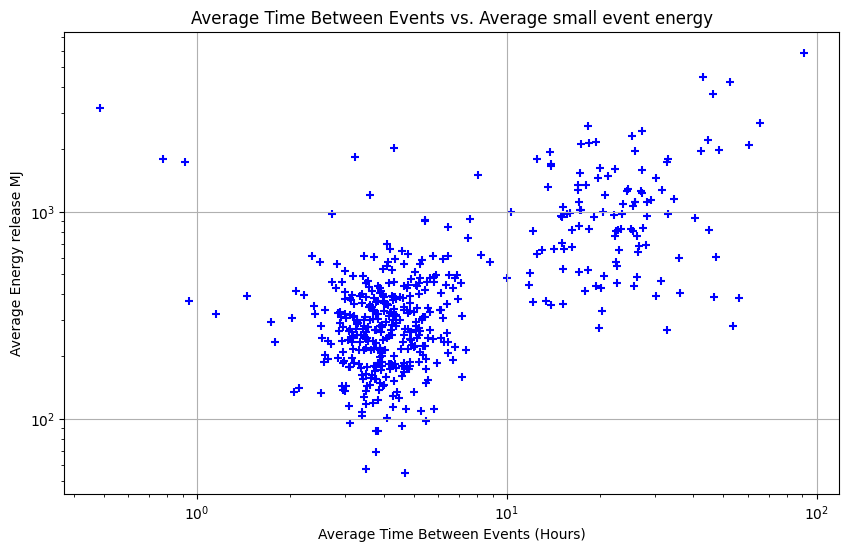

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(month_data['avg_time_between_events'].dt.total_seconds()/3600, month_data['avg_small_energy']/1000000, marker='+', color='blue')

# Plot formatting
plt.title('Average Time Between Events vs. Average small event energy')
plt.xlabel('Average Time Between Events (Hours)')
plt.ylabel('Average Energy release MJ')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [89]:
from scipy import stats

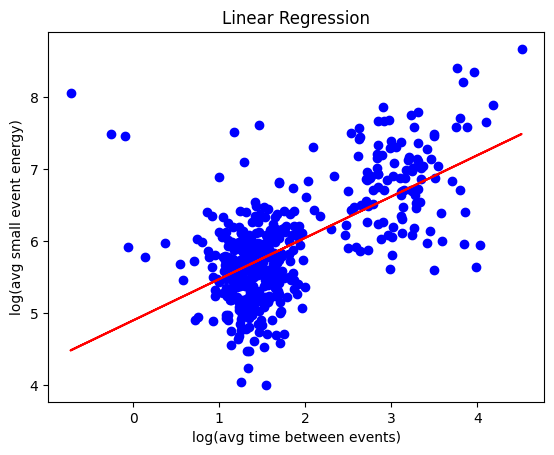

The linear regression has a standard error of 0.0329, a p-value of 0.0, and an r-squared value of 0.6245


In [90]:
X=np.log(month_data['avg_time_between_events'].dt.total_seconds()/3600)
Y=np.log(month_data['avg_small_energy']/1000000)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, slope*X + intercept, 'r', label='Fitted Line')
plt.xlabel('log(avg time between events)')
plt.ylabel('log(avg small event energy)')
plt.title('Linear Regression')
plt.show()
print(f"The linear regression has a standard error of {round(std_err,4)}, a p-value of {round(p_value,9)}, and an r-squared value of {round(r_value,4)}")

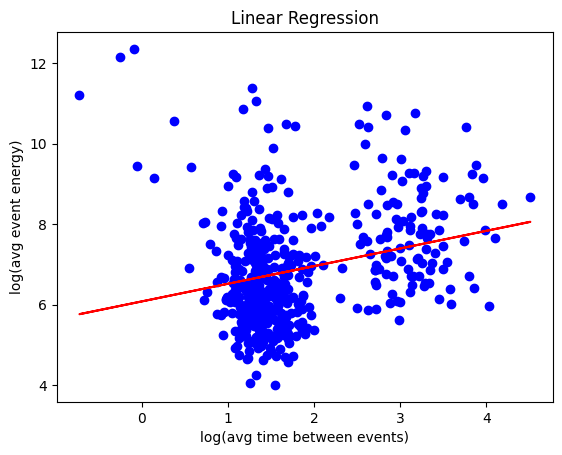

The linear regression has a standard error of 0.0744, a p-value of 7e-09, and an r-squared value of 0.2604


In [91]:
X=np.log(month_data['avg_time_between_events'].dt.total_seconds()/3600)
Y=np.log(month_data['avg_energy']/1000000)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(X, Y)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, slope1*X + intercept1, 'r', label='Fitted Line')
plt.xlabel('log(avg time between events)')
plt.ylabel('log(avg event energy)')
plt.title('Linear Regression')
plt.show()
print(f"The linear regression has a standard error of {round(std_err1,4)}, a p-value of {round(p_value1,9)}, and an r-squared value of {round(r_value1,4)}")

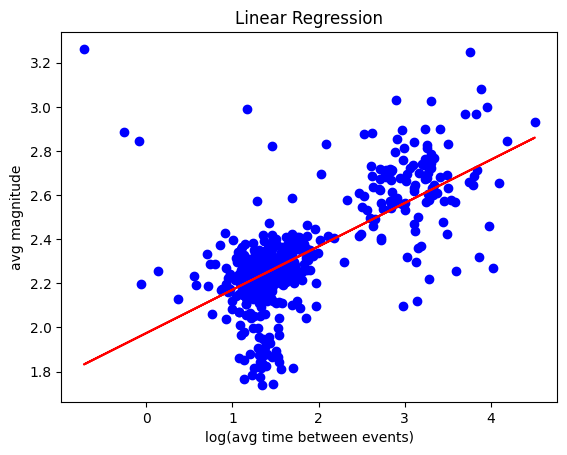

The linear regression has a standard error of 0.0107, a p-value of 0.0, and an r-squared value of 0.6444


In [92]:
X=np.log(month_data['avg_time_between_events'].dt.total_seconds()/3600)
Y=month_data['avg_magnitude']
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(X, Y)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, slope1*X + intercept1, 'r', label='Fitted Line')
plt.xlabel('log(avg time between events)')
plt.ylabel('avg magnitude')
plt.title('Linear Regression')
plt.show()
print(f"The linear regression has a standard error of {round(std_err1,4)}, a p-value of {round(p_value1,9)}, and an r-squared value of {round(r_value1,4)}")

In [93]:
# Group by 'year' and 'month'
grouped2 = quakes.groupby('year')
# Apply the function to each group
year_data = grouped2.apply(calculate_stats).reset_index()

In [94]:
year_data['datetime'] = pd.to_datetime(year_data[['year']].assign(month=1,day=1))

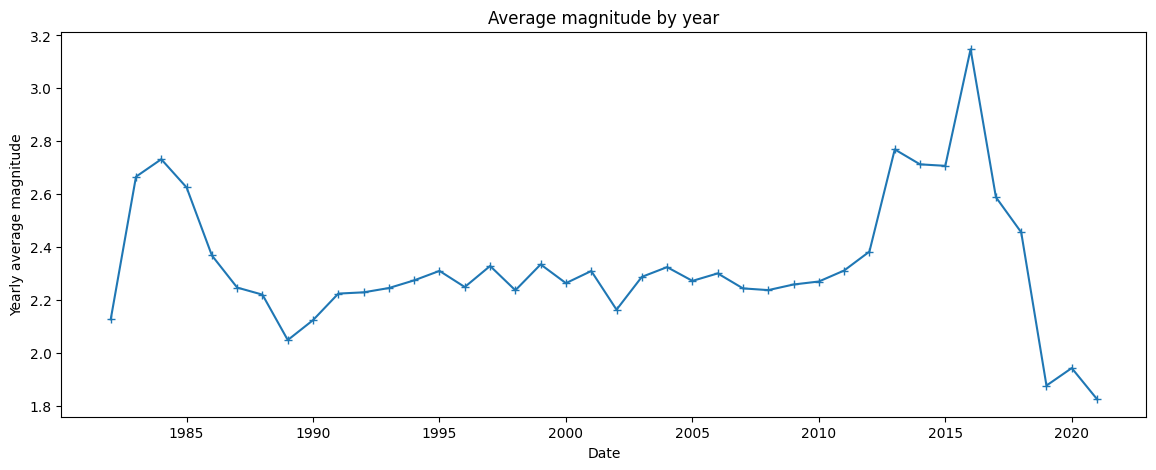

In [95]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['avg_magnitude'], marker='+', linestyle='-')
plt.title('Average magnitude by year')
plt.xlabel('Date')
plt.ylabel('Yearly average magnitude')
plt.show()

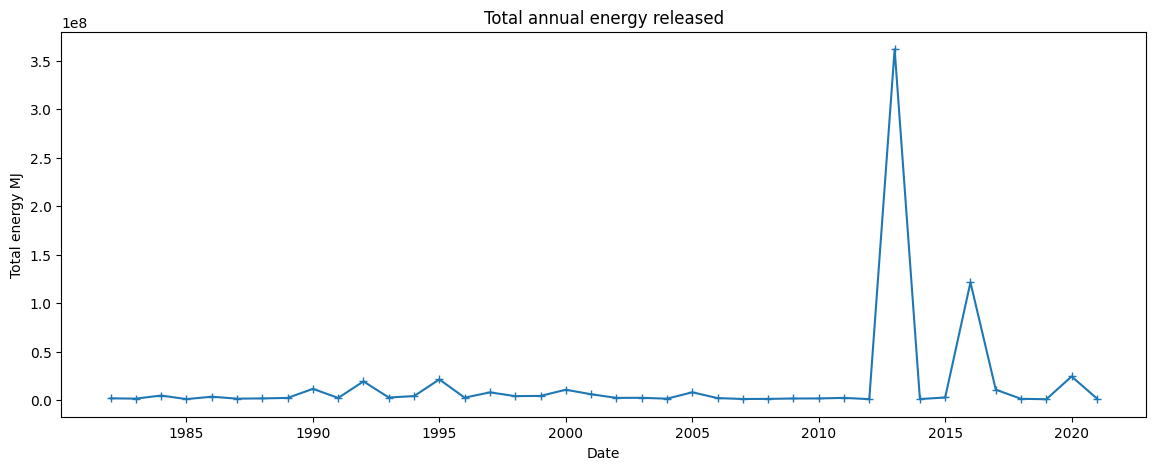

In [96]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['total_energy']/1000000, marker='+', linestyle='-')
plt.title('Total annual energy released')
plt.xlabel('Date')
plt.ylabel('Total energy MJ')
plt.show()

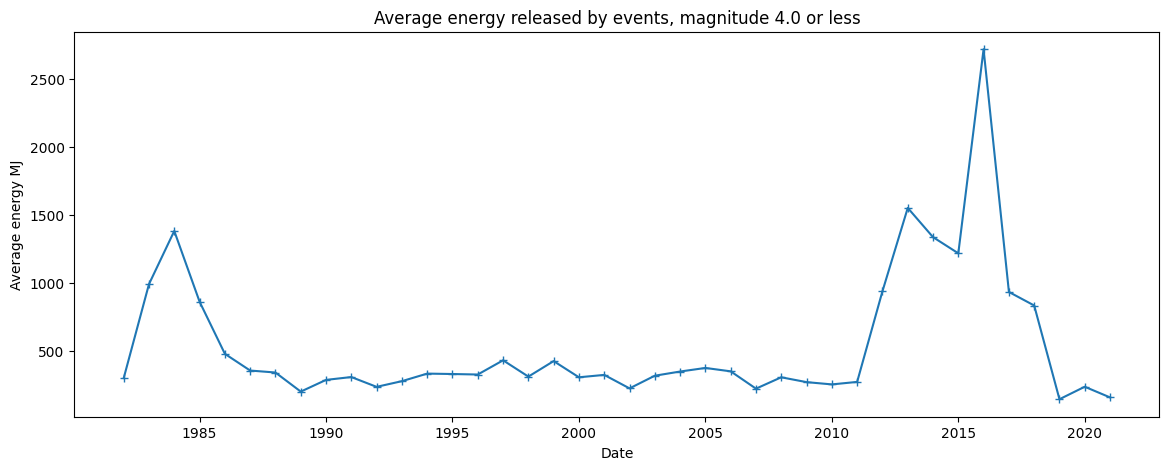

In [97]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['avg_small_energy']/1000000, marker='+', linestyle='-')
plt.title('Average energy released by events, magnitude 4.0 or less')
plt.xlabel('Date')
plt.ylabel('Average energy MJ')
plt.show()

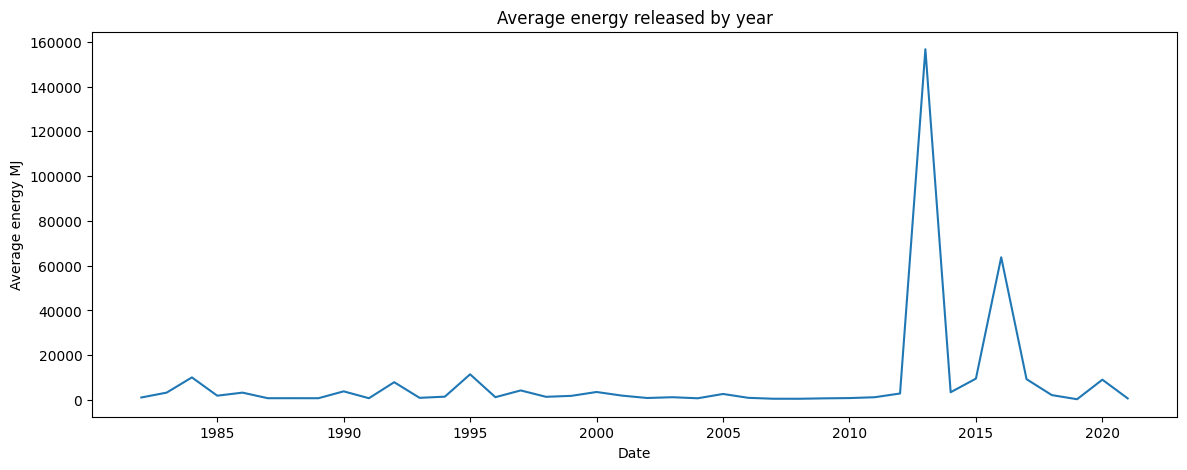

In [98]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['avg_energy']/1000000, marker='none', linestyle='-')
plt.title('Average energy released by year')
plt.xlabel('Date')
plt.ylabel('Average energy MJ')
plt.show()

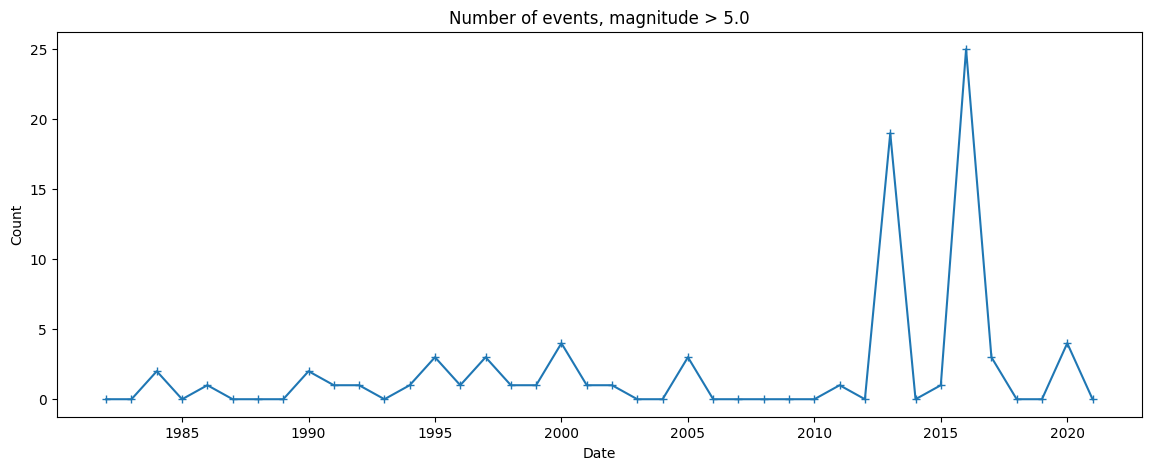

In [99]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['num_events_gt_5'], marker='+', linestyle='-')
plt.title('Number of events, magnitude > 5.0')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

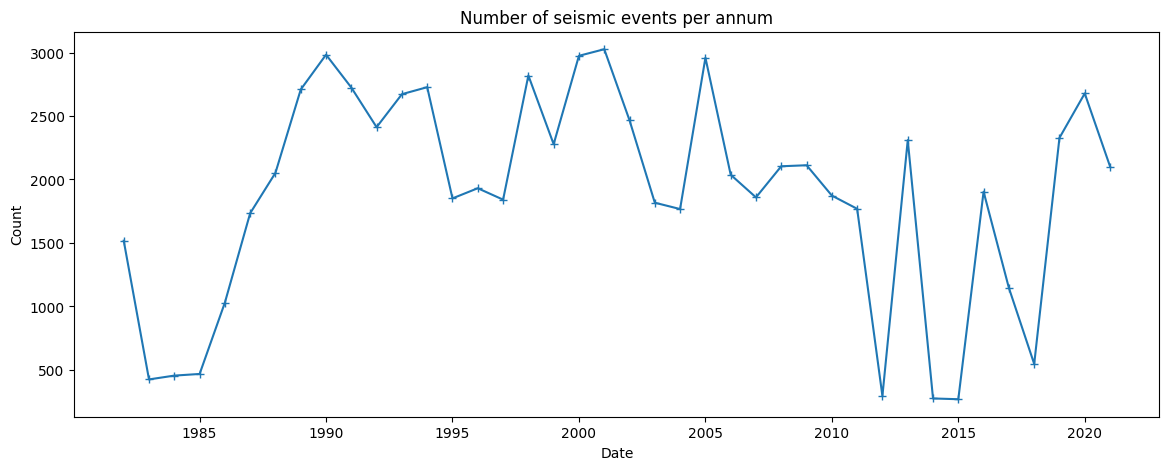

In [100]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['total_events'], marker='+', linestyle='-')
plt.title('Number of seismic events per annum')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

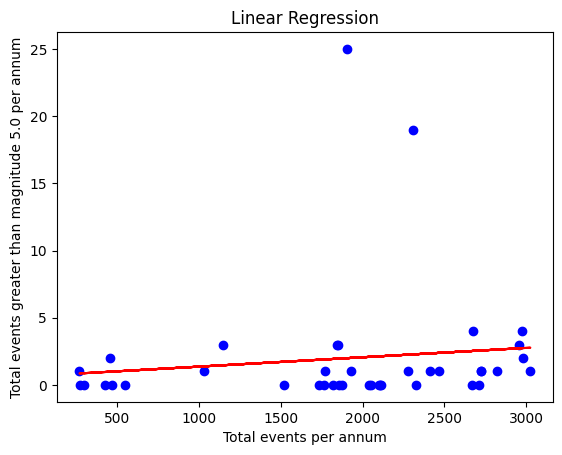

The linear regression has a standard error of 0.0009, a p-value of 0.457966341, and an r-squared value of 0.1208


In [101]:
X=year_data['total_events']
Y=year_data['num_events_gt_5']
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(X, Y)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, slope2*X + intercept2, 'r', label='Fitted Line')
plt.xlabel('Total events per annum')
plt.ylabel('Total events greater than magnitude 5.0 per annum')
plt.title('Linear Regression')
plt.show()
print(f"The linear regression has a standard error of {round(std_err2,4)}, a p-value of {round(p_value2,9)}, and an r-squared value of {round(r_value2,4)}")

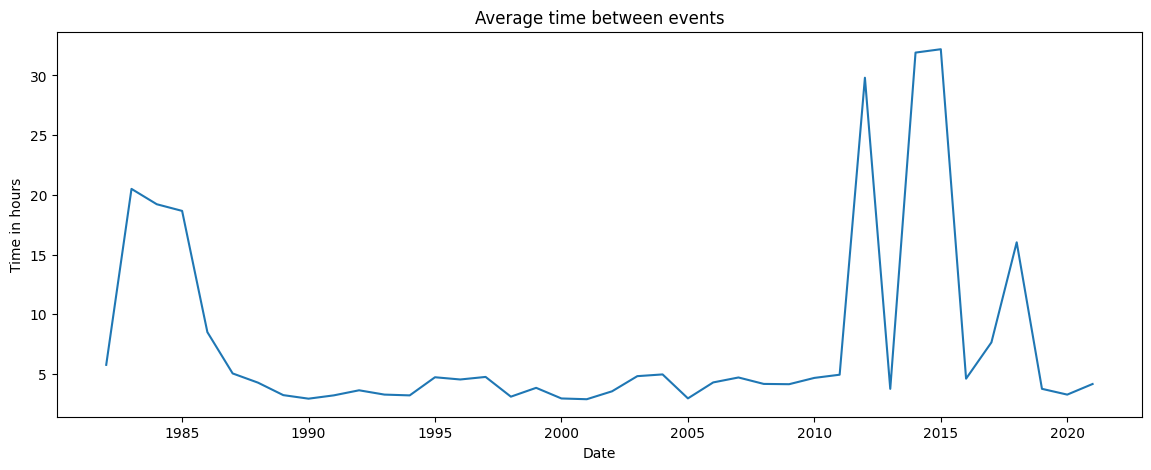

In [102]:
plt.figure(figsize=(14, 5))
plt.plot(year_data['datetime'], year_data['avg_time_between_events'].dt.total_seconds()/3600, marker='none', linestyle='-')
plt.title('Average time between events')
plt.xlabel('Date')
plt.ylabel('Time in hours')
plt.show()

### Rolling aggregations

In [264]:
rolling = Wdata[Wdata['eventtype']=='earthquake']
qmean_mag=np.mean(rolling[rolling['magnitude']>0]['magnitude'])
rolling['origintime'] = pd.to_datetime(rolling['origintime'],utc=True)
rolling.loc[rolling['magnitude'] < 0, 'magnitude'] = qmean_mag
rolling['energy']=10**(4.4+1.5*rolling['magnitude'])
rolling['year']=rolling['origintime'].dt.year
rolling['month']=rolling['origintime'].dt.month
rolling['is_big']=rolling['magnitude']>=5
rolling = rolling.drop(columns=['originerror', 'magnitudeuncertainty', 'eventtype'])
rolling.sort_values('origintime', inplace=True)
rolling.reset_index(drop=True,inplace=True)
rolling['cumsum_e_since_big']=0
cumulative_sum=0
# Iterate over each event
for idx, row in rolling.iterrows():
    if row['is_big']:
        # For a big event, the cumulative sum up to this point is finalized
        rolling.at[idx, 'cumsum_e_since_big'] = cumulative_sum
        # Reset cumulative sum (but do not include the current event's energy)
        cumulative_sum = 0
    else:
        # Update cumulative sum for non-big events
        cumulative_sum += row['energy']
        rolling.at[idx, 'cumsum_e_since_big'] = cumulative_sum
rolling['time_since_last']=rolling['origintime'].diff().dt.total_seconds()/3600
rolling['downtime_since_big'] = rolling['origintime']-rolling['origintime'].where(rolling['is_big']).ffill()
rolling['downtime_since_big']=rolling['downtime_since_big'].dt.total_seconds()/3600
rolling.head()

,publicid,origintime,longitude,latitude,magnitude,depth,energy,year,month,is_big,cumsum_e_since_big,time_since_last,downtime_since_big
0,1685163,1982-01-01 04:56:00.600000+00:00,175.27299,-40.958,1.875,32.7,1.631173e+07,1982,1,False,1.631173e+07,NaN,NaN
1,1685164,1982-01-02 18:02:11.540000+00:00,175.18800,-41.134,1.700,26.9,8.912509e+06,1982,1,False,2.522424e+07,37.103039,NaN
2,1685165,1982-01-02 22:57:15+00:00,175.24500,-41.156,2.200,29.8,5.011872e+07,1982,1,False,7.534296e+07,4.917628,NaN
3,1685166,1982-01-03 15:46:21.310000+00:00,175.17500,-40.698,2.100,38.5,3.548134e+07,1982,1,False,1.108243e+08,16.818419,NaN
4,1685167,1982-01-04 01:34:43.600000+00:00,174.27200,-41.773,2.425,15.1,1.090184e+08,1982,1,False,2.198427e+08,9.806192,NaN


In [105]:
rolling.set_index('origintime', inplace=True)
# Calculate 20-day rolling average of 'magnitude'
rolling['20_avg_mag'] = rolling['magnitude'].rolling(window='20D').mean()
# Calculate 20-day rolling average of 'downtime'
rolling['20_avg_downtime'] = rolling['time_since_last'].rolling(window='20D').mean()
# Calculate 20-day rolling total of 'energy'
rolling['20_tot_energy'] = rolling['energy'].rolling(window='20D').sum()
# Calculate 20-day rolling average of 'depth'
rolling['20_avg_depth'] = rolling['depth'].rolling(window='20D').mean()
# Calculate rolling count of instances in the last 20 days
rolling['20_day_count'] = rolling['energy'].rolling(window='20D').count()
# Calculate 5-day rolling average of 'magnitude'
rolling['5_avg_mag'] = rolling['magnitude'].rolling(window='5D').mean()
# Calculate 5-day rolling average of 'downtime'
rolling['5_avg_downtime'] = rolling['time_since_last'].rolling(window='5D').mean()
# Calculate 5-day rolling total of 'energy'
rolling['5_tot_energy'] = rolling['energy'].rolling(window='5D').sum()
# Calculate 5-day rolling average of 'depth'
rolling['5_avg_depth'] = rolling['depth'].rolling(window='5D').mean()
# Calculate rolling count of instances in the last 20 days
rolling['5_day_count'] = rolling['energy'].rolling(window='5D').count()
# Reset index 
rolling.reset_index(inplace=True)

## Machine Learning

### Next Magnitude prediction

#### Variable creation

In [111]:
#Find the index of the first 'big_event' to start dataframe:
rolling.index[rolling['is_big']].tolist()[0]

1949

In [112]:
#Create Features data frame 'X':
st=1949
en=rolling.shape[0]-1
X = rolling.iloc[st:en]
X = X.drop(columns=['origintime','publicid','longitude','latitude','year','month','is_big'])
X = X.reset_index(drop=True)
X['log_20_dt']=np.log(X['20_avg_downtime'])
X['log_5_dt']=np.log(X['5_avg_downtime'])
X.shape

(73295, 18)

In [113]:
X.isna().sum().sum()

0

In [114]:
(X < 0).sum().sum()

6699

In [192]:
(X<0).sum()

magnitude                0
depth                    0
energy                   0
cumsum_e_since_big       0
time_since_last          0
downtime_since_big       0
20_avg_mag               0
20_avg_downtime          0
20_tot_energy            0
20_avg_depth             0
20_day_count             0
5_avg_mag                0
5_avg_downtime           0
5_tot_energy             0
5_avg_depth              0
5_day_count              0
log_20_dt             2734
log_5_dt              3965
dtype: int64

In [115]:
X.columns

Index(['magnitude', 'depth', 'energy', 'cumsum_e_since_big', 'time_since_last',
       'downtime_since_big', '20_avg_mag', '20_avg_downtime', '20_tot_energy',
       '20_avg_depth', '20_day_count', '5_avg_mag', '5_avg_downtime',
       '5_tot_energy', '5_avg_depth', '5_day_count', 'log_20_dt', 'log_5_dt'],
      dtype='object')

In [116]:
#Create Target dataframe 'Y':
Y=rolling['magnitude'].iloc[(st+1):(en+1)]
Y.shape

(73295,)

In [117]:
Y.isna().sum()

0

In [118]:
(Y<0).sum()

0

In [119]:
Y.name = 'next_magnitude'

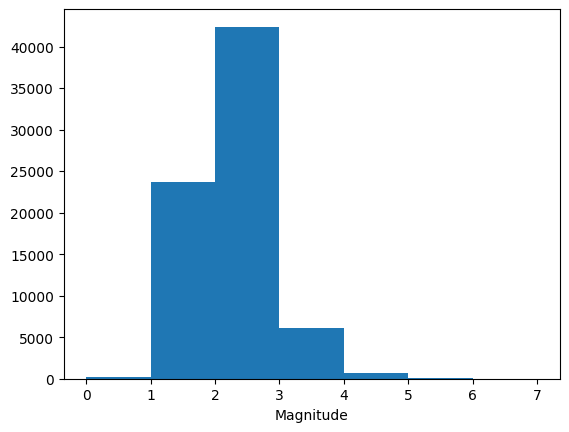

In [248]:
bins=np.arange(0,8)
plt.hist(Y,bins=bins)
plt.xlabel ("Magnitude")
plt.show()

In [249]:
sum(Y<2)

23986

In [250]:
np.sum((Y >=2) & (Y <4))

48495

In [251]:
sum(Y>=4)

814

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=94)

In [122]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

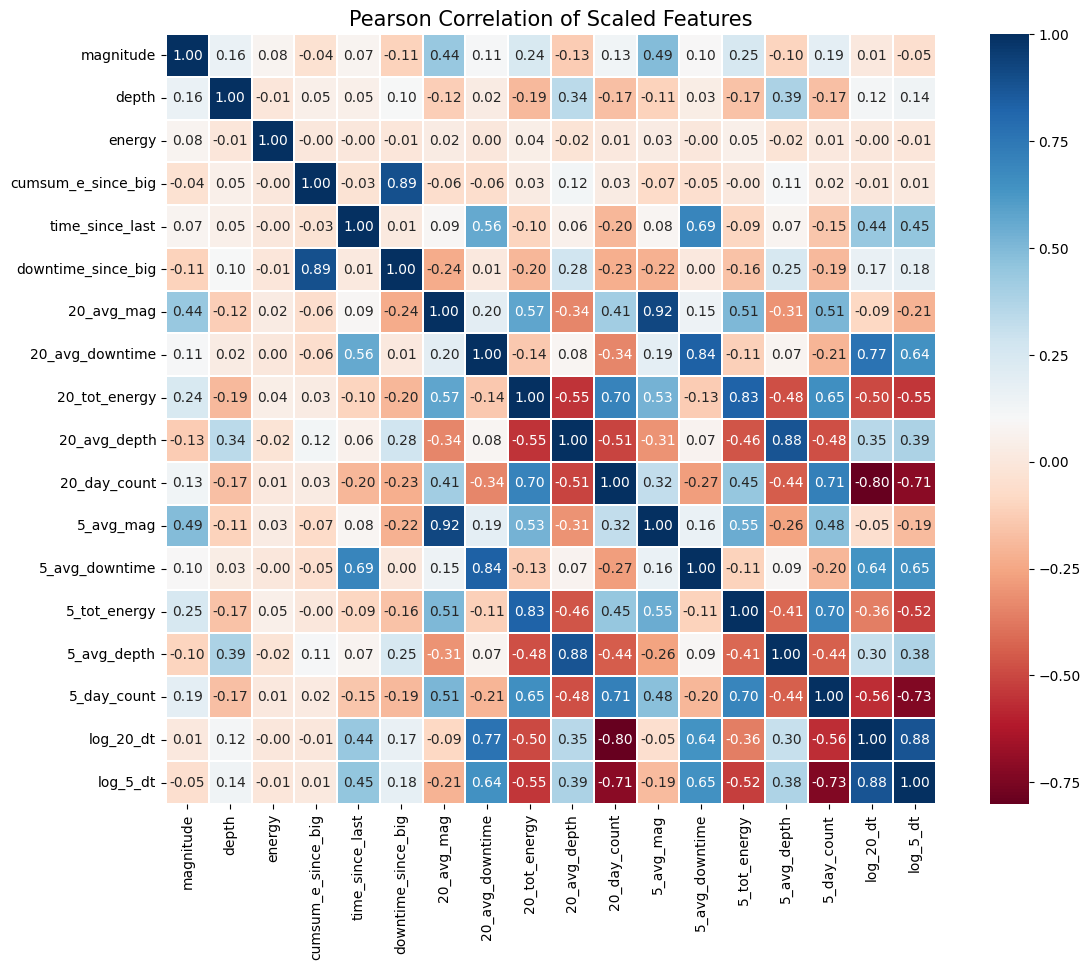

In [272]:
colormap = plt.cm.RdBu
plt.figure(figsize =(14, 10))
plt.title('Pearson Correlation of Scaled Features', size = 15)
sns.heatmap(pd.DataFrame(X_train_scaled,columns=X.columns).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True,
           fmt='.2f')
plt.show()

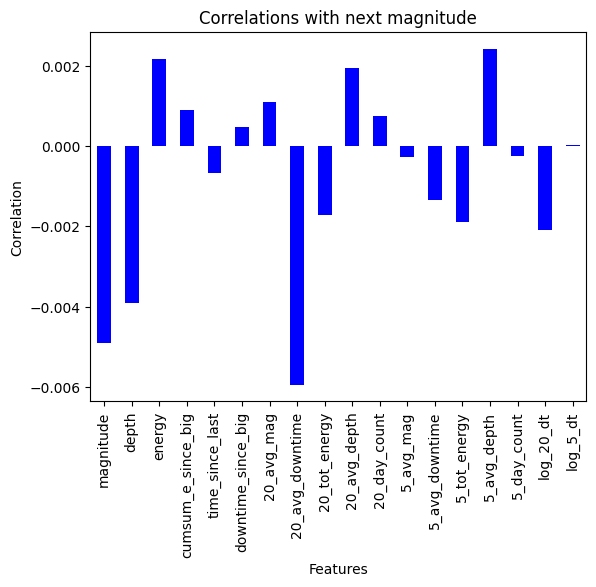

In [127]:
corr_with_target = pd.DataFrame(X_train_scaled,columns=X.columns).corrwith(y_train)
corr_with_target.plot(kind='bar',color='blue')
plt.title(f"Correlations with next magnitude")
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

#### Modelling

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

In [130]:
magmodel1 = LR()
magmodel1.fit(X_train_scaled,y_train)
magmodel1.score(X_train_scaled,y_train)

0.20220390645878628

In [143]:
magmodel2 = RFR(random_state=94,n_jobs=-1)
magmodel2.fit(X_train,y_train)
magmodel2.score(X_train,y_train)

0.8862294179299794

In [137]:
%%time
RegRF=RFR(random_state=94,n_jobs=-1)
RF_params = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 10],
    'bootstrap': [True, False]
    
}
# Create a GridSearchCV object
grid_searchRF = GridSearchCV(RegRF, RF_params, cv=10, scoring='neg_mean_squared_error')
# Fit the grid search to the data
grid_searchRF.fit(X_train_scaled, y_train)
# Get the best parameters
best_paramsRF = grid_searchRF.best_params_
magmodelRF = grid_searchRF.best_estimator_
magmodelRF = magmodelRF.fit(X_train_scaled, y_train)
print(f"Best Parameters: {best_paramsRF}")
print(f"Train set r-squared of best model is {magmodelRF.score(X_train_scaled,y_train)}")

Best Parameters: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Train set r-squared of best model is 0.7363681143662901
CPU times: user 5min 7s, sys: 2min 44s, total: 7min 52s
Wall time: 24min 32s


In [132]:
%%time
magmodel3 = SVR(epsilon=0.2)
magmodel3.fit(X_train_scaled,y_train)
magmodel3.score(X_train_scaled,y_train)

CPU times: user 8min 9s, sys: 1.08 s, total: 8min 10s
Wall time: 8min 10s


0.2264412376084738

In [133]:
%%time
magmodel4 = SVR(epsilon=0.2,C=100)
magmodel4.fit(X_train_scaled,y_train)
magmodel4.score(X_train_scaled,y_train)

CPU times: user 2h 47min 24s, sys: 36.4 s, total: 2h 48min 1s
Wall time: 2h 48min 16s


0.28675388827396087

In [134]:
%%time
magmodel5 = LGBMRegressor()
magmodel5.fit(X_train_scaled,y_train)
magmodel5.score(X_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 58636, number of used features: 18
[LightGBM] [Info] Start training from score 2.270399
CPU times: user 1.72 s, sys: 48.9 ms, total: 1.77 s
Wall time: 514 ms


0.27179762550407116

In [135]:
%%time
magmodel6 = ElasticNet(alpha=1.0, l1_ratio=0.5)
magmodel6.fit(X_train_scaled,y_train)
magmodel6.score(X_train_scaled,y_train)

CPU times: user 72.5 ms, sys: 21 ms, total: 93.5 ms
Wall time: 19.9 ms


0.0

#### Stratified input

In [254]:
#Create a stratified data subset for training for better pattern recognition:
low_indices=np.where(Y<2)[0]
mid_indices=np.where((Y >=2) & (Y <4))[0]
big_indices=np.where(Y>=4)[0]
duplicated_big_indices=list(big_indices)*20
np.random.seed(94)
sampled_low_indices=np.random.choice(low_indices, size=16280,replace=False)
sampled_mid_indices=np.random.choice(mid_indices, size=16280,replace=False)
strat_indices=np.concatenate([sampled_low_indices,sampled_mid_indices,duplicated_big_indices])
np.random.shuffle(strat_indices)
Xstrat = X.iloc[strat_indices]
Ystrat = Y.iloc[strat_indices]
# Split data into training and testing sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xstrat, Ystrat, test_size=0.2, random_state=94)
stratscaler = StandardScaler()
Xs_train_scaled = stratscaler.fit_transform(Xs_train)
Xs_test_scaled = stratscaler.transform(Xs_test)

In [255]:
%%time
stratmodel1 = LGBMRegressor(verbose=-1)
stratmodel1.fit(Xs_train_scaled,ys_train)
stratmodel1.score(Xs_train_scaled,ys_train)

CPU times: user 1.48 s, sys: 23.4 ms, total: 1.5 s
Wall time: 396 ms


0.7115006975649165

In [256]:
%%time
stratmodel2= SVR(epsilon=0.2)
stratmodel2.fit(Xs_train_scaled,ys_train)
stratmodel2.score(Xs_train_scaled,ys_train)

CPU times: user 3min 56s, sys: 710 ms, total: 3min 57s
Wall time: 3min 57s


0.35507073346782947

#### Assessment

In [138]:
from sklearn.metrics import mean_absolute_error as MAE

In [139]:
def categorical_accuracy(y_true,y_pred,precision=1,tolerance=0.2):
    y_true_rounded = np.around(y_true,decimals=precision)
    y_pred_rounded = np.around(y_pred,decimals=precision)
    within_tolerance = np.abs(y_true_rounded-y_pred_rounded)<=tolerance
    return np.mean(within_tolerance)

In [141]:
y_pred1 = magmodel1.predict(X_test_scaled)
print("Linear Regression Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_pred1)}")
print(f"R-squared on training: {round(magmodel1.score(X_train_scaled,y_train),6)},and testing:{round(magmodel1.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_pred1),6)}")

Linear Regression Model:
Mean absolute error on testing: 0.37647147494916583
R-squared on training: 0.202204,and testing:0.186639
Categorical Accuracy on test set with tolerance 0.2: 0.345794


In [152]:
categorical_accuracy(y_test,y_pred1,tolerance=0.4)

0.6438365509243468

In [144]:
y_pred2 = magmodel2.predict(X_test_scaled)
print("Default Random Forest Regressor Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_pred2)}")
print(f"R-squared on training: {round(magmodel2.score(X_train_scaled,y_train),6)},and testing:{round(magmodel2.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_pred2),6)}")

Default Random Forest Regressor Model:
Mean absolute error on testing: 0.6063071656110032
R-squared on training: -0.633802,and testing:-0.63935
Categorical Accuracy on test set with tolerance 0.2: 0.145508


In [153]:
categorical_accuracy(y_test,y_pred2,tolerance=0.4)

0.34661300225117675

In [148]:
y_pred3 = magmodel3.predict(X_test_scaled)
print("Support Vector Regressor with c=1 Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_pred3)}")
print(f"R-squared on training: {round(magmodel3.score(X_train_scaled,y_train),6)},and testing:{round(magmodel3.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_pred3),6)}")

Support Vector Regressor with c=1 Model:
Mean absolute error on testing: 0.37075763281396157
R-squared on training: 0.226441,and testing:0.182172
Categorical Accuracy on test set with tolerance 0.2: 0.364895


In [154]:
categorical_accuracy(y_test,y_pred3,tolerance=0.4)

0.6520908656797871

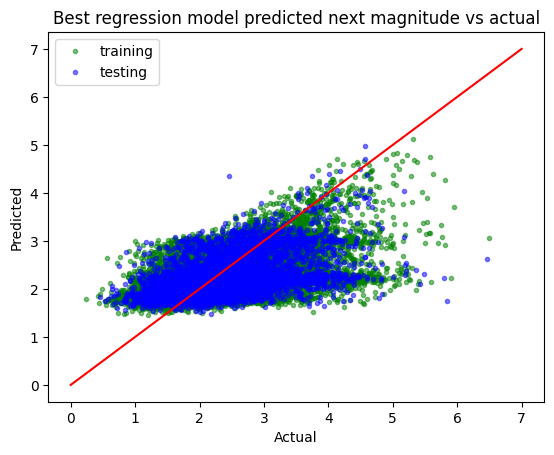

In [265]:
plt.plot(y_train, magmodel3.predict(X_train_scaled), marker='.',linestyle='none',color='green', alpha=0.5,label='training')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best regression model predicted next magnitude vs actual')
plt.legend()
plt.plot([0,7],[0,7],linestyle='-',marker='none',color='r')
plt.show()

In [149]:
y_pred4 = magmodel4.predict(X_test_scaled)
print("Support Vector Regressor with c=100 Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_pred4)}")
print(f"R-squared on training: {round(magmodel4.score(X_train_scaled,y_train),6)},and testing:{round(magmodel4.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_pred4),6)}")

Support Vector Regressor with c=100 Model:
Mean absolute error on testing: 0.38263710771880916
R-squared on training: 0.286754,and testing:0.122148
Categorical Accuracy on test set with tolerance 0.2: 0.35323


In [155]:
categorical_accuracy(y_test,y_pred4,tolerance=0.4)

0.6438365509243468

In [150]:
y_pred5 = magmodel5.predict(X_test_scaled)
print("Light Gradient Boosted Machine Regressor Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_pred5)}")
print(f"R-squared on training: {round(magmodel5.score(X_train_scaled,y_train),6)},and testing:{round(magmodel5.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_pred5),6)}")

Light Gradient Boosted Machine Regressor Model:
Mean absolute error on testing: 0.37465172235140987
R-squared on training: 0.271798,and testing:0.194376
Categorical Accuracy on test set with tolerance 0.2: 0.348114


In [156]:
categorical_accuracy(y_test,y_pred5,tolerance=0.4)

0.6441094208336176

In [175]:
y_predRF = magmodelRF.predict(X_test_scaled)
print("Optimised Random Forest Regressor Model:")
print(f"Mean absolute error on testing: {MAE(y_test,y_predRF)}")
print(f"R-squared on training: {round(magmodelRF.score(X_train_scaled,y_train),6)},and testing:{round(magmodelRF.score(X_test_scaled,y_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(y_test,y_predRF),6)}")

Optimised Random Forest Regressor Model:
Mean absolute error on testing: 0.37847982011353937
R-squared on training: 0.736368,and testing:0.183777
Categorical Accuracy on test set with tolerance 0.2: 0.346545


In [157]:
categorical_accuracy(y_test,y_predRF,tolerance=0.4)

0.6451326829933829

In [257]:
ys_pred1 = stratmodel1.predict(Xs_test_scaled)
print("LGBM Regression Model with stratified training:")
print(f"Mean absolute error on testing: {MAE(ys_test,ys_pred1)}")
print(f"R-squared on training: {round(stratmodel1.score(Xs_train_scaled,ys_train),6)},and testing:{round(stratmodel1.score(Xs_test_scaled,ys_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(ys_test,ys_pred1),6)}")

LGBM Regression Model with stratified training:
Mean absolute error on testing: 0.5347484942198095
R-squared on training: 0.711501,and testing:0.68075
Categorical Accuracy on test set with tolerance 0.2: 0.217752


In [258]:
categorical_accuracy(ys_test,ys_pred1,tolerance=0.4)

0.4548525798525799

In [259]:
ys_pred2 = stratmodel2.predict(Xs_test_scaled)
print("SVR Regression Model with stratified training:")
print(f"Mean absolute error on testing: {MAE(ys_test,ys_pred2)}")
print(f"R-squared on training: {round(stratmodel2.score(Xs_train_scaled,ys_train),6)},and testing:{round(stratmodel2.score(Xs_test_scaled,ys_test),6)}")
print(f"Categorical Accuracy on test set with tolerance 0.2: {round(categorical_accuracy(ys_test,ys_pred2),6)}")

SVR Regression Model with stratified training:
Mean absolute error on testing: 0.6601802584226587
R-squared on training: 0.355071,and testing:0.336604
Categorical Accuracy on test set with tolerance 0.2: 0.256962


In [260]:
categorical_accuracy(ys_test,ys_pred2,tolerance=0.4)

0.5326576576576577

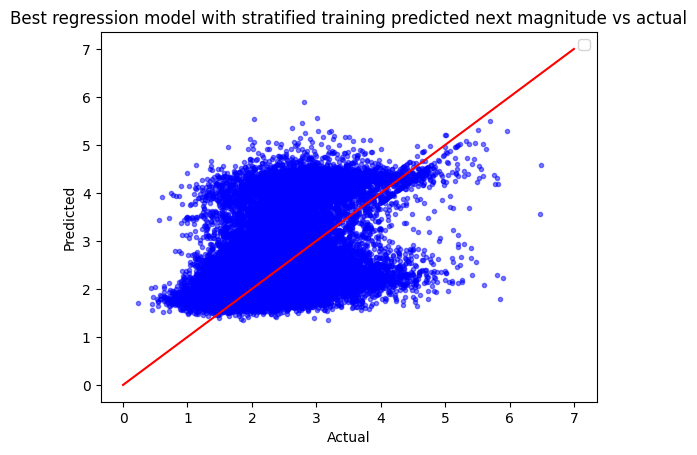

In [261]:
plt.plot(Y, stratmodel2.predict(stratscaler.transform(X)), marker='.',linestyle='none',color='blue',alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best regression model with stratified training predicted next magnitude vs actual')
plt.legend()
plt.plot([0,7],[0,7],linestyle='-',marker='none',color='r')
plt.show()

In [262]:
categorical_accuracy(Y,stratmodel2.predict(stratscaler.transform(X)),tolerance=0.4)

0.5966846306023603

### Next 20 days energy release prediction:

#### Variable creation

In [158]:
cutoff_time = pd.to_datetime('2022-01-01 00:00:00+00:00') - pd.Timedelta(days=20)


In [159]:
#Subset the original X dataframe to account for 20 day projection:
X1 = rolling.iloc[st:en]
X1 = X1[X1['origintime']<cutoff_time]
X1 = X1.drop(columns=['origintime','publicid','longitude','latitude','year','month','is_big'])
X1 = X1.reset_index(drop=True)
X1.shape

(73167, 16)

In [160]:
# Create Target dataframe 'Y1' for 20 day energy release projection:
rolling.set_index('origintime', inplace=True)
Y1 = rolling['energy'].rolling(window='20D').sum().shift(-1) 
rolling.reset_index(inplace=True)
Y1=Y1[Y1.index<cutoff_time]
Y1.reset_index(drop=True,inplace=True)
Y1=Y1.iloc[st:]
Y1.name = 'next_20_total_energy'
Y1.shape

(73167,)

In [161]:
# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=94)

In [164]:
# Scale features
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

#### Modelling

In [165]:
emodel1 = LR()
emodel1.fit(X1_train_scaled,y1_train)
emodel1.score(X1_train_scaled,y1_train)

0.9979787660118606

In [166]:
emodel2 = RFR(random_state=94,n_jobs=-1)
emodel2.fit(X1_train,y1_train)
emodel2.score(X1_train,y1_train)

0.9996313747731715

In [252]:
%%time
RegRF1=RFR(random_state=94,n_jobs=-1)
RF_params = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 10],
    'bootstrap': [True, False]
    
}
# Create a GridSearchCV object
grid_searchRF1 = GridSearchCV(RegRF1, RF_params, cv=10, scoring='neg_mean_squared_error')
# Fit the grid search to the data
grid_searchRF1.fit(X1_train_scaled, y1_train)
# Get the best parameters
best_paramsRF1 = grid_searchRF1.best_params_
emodelRF = grid_searchRF1.best_estimator_
emodelRF = emodelRF.fit(X1_train_scaled, y1_train)
print(f"Best Parameters: {best_paramsRF1}")
print(f"Train set r-squared of best model is {emodelRF.score(X1_train_scaled,y1_train)}")

Best Parameters: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
Train set r-squared of best model is 0.9994127368269571
CPU times: user 3min 57s, sys: 2min 56s, total: 6min 54s
Wall time: 25min 27s


In [168]:
%%time
emodel3 = SVR(epsilon=0.2)
emodel3.fit(X1_train_scaled,y1_train)
emodel3.score(X1_train_scaled,y1_train)

CPU times: user 11min 43s, sys: 1.54 s, total: 11min 45s
Wall time: 11min 46s


-0.045560703097359934

In [171]:
%%time
emodel4 = SVR(epsilon=0.2,C=10)
emodel4.fit(X1_train_scaled,y1_train)
emodel4.score(X1_train_scaled,y1_train)

CPU times: user 11min 50s, sys: 2.29 s, total: 11min 53s
Wall time: 11min 54s


-0.04556070285748648

In [169]:
%%time
emodel5 = LGBMRegressor(verbose=-1)
emodel5.fit(X1_train_scaled,y1_train)
emodel5.score(X1_train_scaled,y1_train)

CPU times: user 1.62 s, sys: 29.4 ms, total: 1.65 s
Wall time: 438 ms


0.998961466857586

In [170]:
%%time
emodel6 = ElasticNet(alpha=1.0, l1_ratio=0.5)
emodel6.fit(X1_train_scaled,y1_train)
emodel6.score(X1_train_scaled,y1_train)

CPU times: user 479 ms, sys: 34.2 ms, total: 514 ms
Wall time: 134 ms


0.9180385079845403

#### Assessment

In [184]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [172]:
y1_pred1 = emodel1.predict(X1_test_scaled)
print("Linear Regression Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred1)}")
print(f"R-squared on training: {round(emodel1.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel1.score(X1_test_scaled,y1_test),6)}")

Linear Regression Model:
Mean absolute error on testing: 37712331352.527664
R-squared on training: 0.997979,and testing:0.999678


In [185]:
MAPE(y1_test,y1_pred1)

0.4436233179225313

In [180]:
y1_pred2 = emodel2.predict(X1_test_scaled)
print("Random Forest Regressor Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred2)}")
print(f"R-squared on training: {round(emodel2.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel2.score(X1_test_scaled,y1_test),6)}")

Random Forest Regressor Model:
Mean absolute error on testing: 5993666123451.691
R-squared on training: -0.045861,and testing:-0.045551


In [186]:
MAPE(y1_test,y1_pred2)

0.7466688641456342

In [181]:
y1_pred3 = emodel3.predict(X1_test_scaled)
print("Support Vector Regressor with C=1 Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred3)}")
print(f"R-squared on training: {round(emodel3.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel3.score(X1_test_scaled,y1_test),6)}")

Support Vector Regressor with C=1 Model:
Mean absolute error on testing: 5975219310231.768
R-squared on training: -0.045561,and testing:-0.045243


In [187]:
MAPE(y1_test,y1_pred3)

1.1681242193569703

In [179]:
y1_pred4 = emodel4.predict(X1_test_scaled)
print("Support Vector Regressor with C=10 Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred4)}")
print(f"R-squared on training: {round(emodel4.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel4.score(X1_test_scaled,y1_test),6)}")

Support Vector Regressor with C=10 Model:
Mean absolute error on testing: 5975219306670.391
R-squared on training: -0.045561,and testing:-0.045243


In [188]:
MAPE(y1_test,y1_pred4)

1.1681241578750325

In [178]:
y1_pred5 = emodel5.predict(X1_test_scaled)
print("Light Gradient Boosting Machine Regression Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred5)}")
print(f"R-squared on training: {round(emodel5.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel5.score(X1_test_scaled,y1_test),6)}")

Light Gradient Boosting Machine Regression Model:
Mean absolute error on testing: 66343464537.562454
R-squared on training: 0.998961,and testing:0.999458


In [189]:
MAPE(y1_test,y1_pred5)

0.34767864152248834

In [177]:
y1_pred6 = emodel6.predict(X1_test_scaled)
print("Elastic Net Regression Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_pred6)}")
print(f"R-squared on training: {round(emodel6.score(X1_train_scaled,y1_train),6)},and testing:{round(emodel6.score(X1_test_scaled,y1_test),6)}")

Elastic Net Regression Model:
Mean absolute error on testing: 3041524878338.98
R-squared on training: 0.918039,and testing:0.915281


In [190]:
MAPE(y1_test,y1_pred6)

36.49368136145142

In [183]:
y1_predRF = emodelRF.predict(X1_test_scaled)
print("Optimised Random Forest Regressor Model:")
print(f"Mean absolute error on testing: {MAE(y1_test,y1_predRF)}")
print(f"R-squared on training: {round(emodelRF.score(X1_train_scaled,y1_train),6)},and testing:{round(emodelRF.score(X1_test_scaled,y1_test),6)}")

Optimised Random Forest Regressor Model:
Mean absolute error on testing: 43244549964.85853
R-squared on training: 0.999413,and testing:0.998944


In [191]:
MAPE(y1_test,y1_predRF)

0.1369926838239588

In [267]:
np.min(Y1)

139374528.2114649

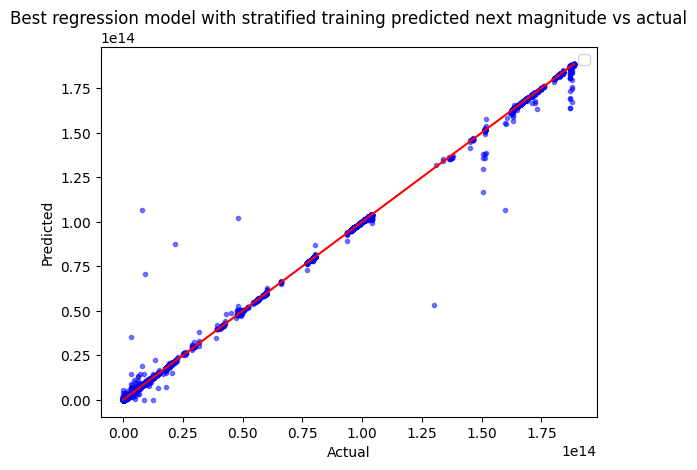

In [268]:
plt.plot(Y1, emodelRF.predict(scaler1.transform(X1)), marker='.',linestyle='none',color='blue',alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best regression model predicted next 20 day total energy release vs actual')
plt.legend()
plt.plot([139374528,188654306096775],[139374528,188654306096775],linestyle='-',marker='none',color='r')
plt.show()

### Next Big event prediction

#### Variable creation

In [193]:
# Create Target dataframe 'Y2' for prediction if next event i magnitude 5.0 or greater:
Y2=rolling['is_big'].iloc[(st+1):(en+1)]

In [220]:
sum(Y2)

79

In [221]:
len(Y2)

73295

In [194]:
X2 = X

In [222]:
true_indices=np.where(Y2)[0]
false_indices=np.where(~Y2)[0]
duplicated_indices=list(true_indices)*200
np.random.seed(94)
sampled_indices=np.random.choice(false_indices, size=15800,replace=False)
combined_indices=np.concatenate([sampled_indices,duplicated_indices])
np.random.shuffle(combined_indices)

In [226]:
Y3 = Y2.iloc[combined_indices]
X3 = X2.iloc[combined_indices]

In [227]:
# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=94)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=94)

In [196]:
# Scale features
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [236]:
scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

#### Modelling

In [208]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeClassifier as DTC
from lightgbm import LGBMClassifier as LGBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import StackingClassifier as SC

In [204]:
%%time
LR = LogReg(max_iter=10000, random_state=94)
LR_params = {
    'C': [0.1,1,10,100],
    'solver': ['lbfgs','sag']
}
# Create a GridSearchCV object
grid_searchLR = GridSearchCV(LR, LR_params, cv=5, scoring='recall',n_jobs=-1)
# Fit the grid search to the data
grid_searchLR.fit(X2_train_scaled, y2_train)
# Get the best parameters
best_paramsLR = grid_searchLR.best_params_
best_modelLR = grid_searchLR.best_estimator_
best_modelLR = best_modelLR.fit(X2_train_scaled, y2_train)
print(f"Best Parameters: {best_paramsLR}")
print(f"Best Recall: {grid_searchLR.best_score_}")
print(f"Train set accuracy of best model is {best_modelLR.score(X2_train_scaled,y2_train)}")
print(f"Test set accuracy of best model is {best_modelLR.score(X2_test_scaled,y2_test)}")

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Recall: 0.014285714285714285
Train set accuracy of best model is 0.9988573572549287
Test set accuracy of best model is 0.9991813902721878
CPU times: user 767 ms, sys: 225 ms, total: 993 ms
Wall time: 4min 11s


In [206]:
%%time
DT = DTC(random_state=94)
#Perform gridsearch to optimise parameters
DT_params = {
    'max_depth': [3,5,7],
    'min_samples_split': [2,4,10,20],
    'min_samples_leaf': [1,2,4,6,10],
    'criterion': ["gini","entropy"],
    'min_impurity_decrease': [0.02,0.01,0.001]
}
# Create a GridSearchCV object
grid_searchDT = GridSearchCV(DT, DT_params, cv=5, scoring='recall',n_jobs=-1)
# Fit the grid search to the data
grid_searchDT.fit(X2_train_scaled, y2_train)
# Get the best parameters
best_paramsDT = grid_searchDT.best_params_
best_modelDT = grid_searchDT.best_estimator_
best_modelDT = best_modelDT.fit(X2_train_scaled, y2_train)
print(f"Best Parameters: {best_paramsDT}")
print(f"Best Recall: {grid_searchDT.best_score_}")
print(f"Train set accuracy of best model is {best_modelDT.score(X2_train_scaled,y2_train)}")
print(f"Test set accuracy of best model is {best_modelDT.score(X2_test_scaled,y2_test)}")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.02, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Recall: 0.0
Train set accuracy of best model is 0.9988573572549287
Test set accuracy of best model is 0.9991813902721878
CPU times: user 6.9 s, sys: 1.18 s, total: 8.09 s
Wall time: 1min 22s


In [214]:
%%time
LGB = LGBC(random_state=94, verbose=-1)
# Perform gridsearch to optimise parameters
LGBC_params = {
    'learning_rate': [0.02,0.04],
    'num_leaves': [11,15,31],
    'max_depth': [7,9],
    'min_child_samples': [5,15,25],
    'n_estimators': [50,100],
    'feature_fraction': [0.6,0.8,1.0] 
    
}
# Create a GridSearchCV object
grid_searchLGB = GridSearchCV(LGB, LGBC_params, cv=5, scoring='recall',n_jobs=-1)
# Fit the grid search to the data
grid_searchLGB.fit(X2_train_scaled, y2_train)
# Get the best parameters
best_paramsLGB = grid_searchLGB.best_params_
best_modelLGB = grid_searchLGB.best_estimator_
best_modelLGB = best_modelLGB.fit(X2_train_scaled, y2_train)
print(f"Best Parameters: {best_paramsLGB}")
print(f"Best Recall: {grid_searchLGB.best_score_}")
print(f"Train set accuracy of best model is {best_modelLGB.score(X2_train_scaled,y2_train)}")
print(f"Test set accuracy of best model is {best_modelLGB.score(X2_test_scaled,y2_test)}")

Best Parameters: {'feature_fraction': 0.6, 'learning_rate': 0.04, 'max_depth': 9, 'min_child_samples': 15, 'n_estimators': 50, 'num_leaves': 31}
Best Recall: 0.1340659340659341
Train set accuracy of best model is 0.9995906951360939
Test set accuracy of best model is 0.9987720854082816
CPU times: user 6.82 s, sys: 940 ms, total: 7.76 s
Wall time: 4min 11s


In [216]:
%%time
RFc = RFC(random_state=94,n_jobs=-1)
#Perform gridsearch to optimise parameters
RFC_params = {
    'criterion': ["entropy"],
    'max_depth': [None],
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [10],
    'bootstrap': [True]
}
# Create a GridSearchCV object
grid_searchRFC = GridSearchCV(RFc, RFC_params, cv=5, scoring='recall',n_jobs=-1)
# Fit the grid search to the data
grid_searchRFC.fit(X2_train_scaled, y2_train)
# Get the best parameters
best_paramsRFC = grid_searchRFC.best_params_
best_modelRFC = grid_searchRFC.best_estimator_
best_modelRFC = best_modelRFC.fit(X2_train_scaled, y2_train)
print(f"Best Parameters: {best_paramsRFC}")
print(f"Best Recall: {grid_searchRFC.best_score_}")
print(f"Train set accuracy of best model is {best_modelRFC.score(X2_train_scaled,y2_train)}")
print(f"Test set accuracy of best model is {best_modelRFC.score(X2_test_scaled,y2_test)}")

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
Best Recall: 0.015384615384615385
Train set accuracy of best model is 0.9992837164881643
Test set accuracy of best model is 0.99911317279487
CPU times: user 33.9 s, sys: 282 ms, total: 34.2 s
Wall time: 1min 9s


In [219]:
lr = LogReg(solver='lbfgs', max_iter=10000, random_state=94)
estimators = [('mod1', best_modelLR), ('mod2', best_modelDT), ('mod3', best_modelRFC),('mod4', best_modelLGB),('mod5', best_modelRFC)]
sclf = SC(estimators=estimators, final_estimator=lr, cv=5, n_jobs=-1)
Stack_params = {
    'final_estimator__C': [0.1,1, 10, 100]
}
# Create a GridSearchCV object
grid_searchStack = GridSearchCV(sclf, Stack_params, cv=5, scoring='recall',n_jobs=-1,verbose=0)
# Fit the grid search to the data
grid_searchStack.fit(X2_train_scaled, y2_train)
# Get the best parameters
best_paramsStack = grid_searchStack.best_params_
best_modelStack = grid_searchStack.best_estimator_
best_modelStack = best_modelStack.fit(X2_train_scaled, y2_train)
print(f"Best Parameters: {best_paramsStack}")
print(f"Best Recall: {grid_searchStack.best_score_}")
print(f"Train set accuracy of best model is {best_modelStack.score(X2_train_scaled, y2_train)}")
print(f"Test set accuracy of best model is {best_modelStack.score(X2_test_scaled, y2_test)}")

Best Parameters: {'final_estimator__C': 10}
Best Recall: 0.015384615384615385
Train set accuracy of best model is 0.9991813902721878
Test set accuracy of best model is 0.998908520362917


In [229]:
%%time
LGB2 = LGBC(random_state=94, verbose=-1)
# Perform gridsearch to optimise parameters
LGBC2_params = {
    'learning_rate': [0.02,0.04,0.06],
    'num_leaves': [15,31,45],
    'max_depth': [9,11],
    'min_child_samples': [5,15,25],
    'n_estimators': [50,100],
    'feature_fraction': [0.4,0.6,0.8,1.0] 
    
}
# Create a GridSearchCV object
grid_searchLGB2 = GridSearchCV(LGB2, LGBC2_params, cv=5, scoring='recall',n_jobs=-1)
# Fit the grid search to the data
grid_searchLGB2.fit(X3_train_scaled, y3_train)
# Get the best parameters
best_paramsLGB2 = grid_searchLGB2.best_params_
best_modelLGB2 = grid_searchLGB2.best_estimator_
best_modelLGB2 = best_modelLGB2.fit(X3_train_scaled, y3_train)
print(f"Best Parameters: {best_paramsLGB2}")
print(f"Best Recall: {grid_searchLGB2.best_score_}")
print(f"Train set accuracy of best model is {best_modelLGB2.score(X3_train_scaled,y3_train)}")
print(f"Test set accuracy of best model is {best_modelLGB2.score(X3_test_scaled,y3_test)}")

Best Parameters: {'feature_fraction': 0.4, 'learning_rate': 0.02, 'max_depth': 9, 'min_child_samples': 5, 'n_estimators': 50, 'num_leaves': 31}
Best Recall: 1.0
Train set accuracy of best model is 0.9841772151898734
Test set accuracy of best model is 0.9830696202531646
CPU times: user 9.14 s, sys: 1.13 s, total: 10.3 s
Wall time: 7min 15s


In [237]:
balanced_pred = best_modelLGB2.predict(scaler3.transform(X2))

In [238]:
from sklearn.metrics import confusion_matrix

In [243]:
pd.DataFrame(confusion_matrix(Y2,balanced_pred), index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

,Predicted Negative,Predicted Positive
True Negative,70748,2468
True Positive,0,79


In [244]:
%%time
LGB3 = LGBC(random_state=94, verbose=-1)
# Perform gridsearch to optimise parameters
LGBC3_params = {
    'learning_rate': [0.02,0.04,0.06],
    'num_leaves': [15,31,45],
    'max_depth': [9,11],
    'min_child_samples': [5,15,25],
    'n_estimators': [50,100],
    'feature_fraction': [0.4,0.6,0.8,1.0] 
    
}
# Create a GridSearchCV object
grid_searchLGB3 = GridSearchCV(LGB3, LGBC3_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchLGB3.fit(X3_train_scaled, y3_train)
# Get the best parameters
best_paramsLGB3 = grid_searchLGB3.best_params_
best_modelLGB3 = grid_searchLGB3.best_estimator_
best_modelLGB3 = best_modelLGB3.fit(X3_train_scaled, y3_train)
print(f"Best Parameters: {best_paramsLGB3}")
print(f"Best Recall: {grid_searchLGB3.best_score_}")
print(f"Train set accuracy of best model is {best_modelLGB3.score(X3_train_scaled,y3_train)}")
print(f"Test set accuracy of best model is {best_modelLGB3.score(X3_test_scaled,y3_test)}")

Best Parameters: {'feature_fraction': 0.4, 'learning_rate': 0.06, 'max_depth': 11, 'min_child_samples': 5, 'n_estimators': 100, 'num_leaves': 45}
Best Recall: 0.9983386075949365
Train set accuracy of best model is 0.9996044303797469
Test set accuracy of best model is 0.9988924050632911
CPU times: user 10.1 s, sys: 1.16 s, total: 11.3 s
Wall time: 7min 8s


In [245]:
balanced_pred2 = best_modelLGB.predict(scaler3.transform(X2))
pd.DataFrame(confusion_matrix(Y2,balanced_pred2), index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

,Predicted Negative,Predicted Positive
True Negative,73211,5
True Positive,79,0
